# Python course on Classes and Functional Programming
#### *J.A. Hernando, USC, 2016*

## More on functions

In [1]:
import time
print(' Last revision ', time.asctime())

 Last revision  Wed Oct 21 20:56:03 2020


In [2]:
# general imports
%matplotlib inline

# the general imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

## 1. About functions

In this notebook we revisit some notions about Functions.

A function in Python is encapsulated pieze of code that can take several arguments, performs several computations and returns a result. 

The next cell shows the definition of a function, named *fib*, that returns a list with the first *n* Fibonacci numbers. 

In [3]:
def fib(n):
    """ returns a list with the first n numbers of the Fibonacci serie
    """
    ns = [0, 1]
    
    for i in range(2, n):
        ns.append(ns[i-2] + ns[i-1])
    
    return ns

In [4]:
n      = 20 
values = fib(n)
print(values)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


A function have a name (interface), *fib*, a type, *function*, it can take arguments, *n*, and it returns something (or none), in this case, *fig* returns a list with the *n* fist Fibonacci numbers. 

The expresions of the function are its body, they follow the definition of the function and they are indented. The variables defined in the body are local and are deleted when the function ends. In this sense, a function defines its own scope. 

In general functions should not change the values of the arguments inside the body. 

Some Functions do not take arguments, or do return nothing. But they are expected to do something, produce some side efects, as printing or writting in a output, plots, etc. 

### 1.1 Recursivity

Python supports recursivity. A function can call itself. Here is the example of the function, *nfactorial*, that computes the factorial of *n*

In [5]:
def nfactorial(n):
    """ returns n! = n*(n-1)*...*1
    """
    if (n <= 1 ): 
        return 1
    return n * nfactorial(n-1)        

In [6]:
print(' 4! = ', nfactorial(5))

 4! =  120


### 1.2 functions inside functions

A funcion can be defined inside another function. The function is then local, and can only be used in the scope of the large function.

In the following example, the *distance()* function is only defined and valid inside *closest_distance_to*.

In [7]:
import math

def element_at_closest_distance_to(x0, xs):
    """ return the element of the *xs* list that is closer to *x0*
    """
    def distance(x0, xi):
        return abs(x0 - xi)
    
    d, x = 1e16, 0
    for xi in xs:
        di = distance(x0, xi)
        if (di < d): 
            d, x = di, xi
    
    return x

In [8]:
x0, xs = 5j, [0., 0.5+1j, 1, 2j]

xi = element_at_closest_distance_to(x0, xs)

print(' closest point to x0 ', x0, ' is :', xi)

 closest point to x0  5j  is : 2j


### 1.3 functions and variables

A function can be associated to a variable and be passed to another piece of code.

In the folowing example *nf* is a variable, which value is the function *nfactorial*.

In [9]:
ns = []
for ni in range(10):
    ns.append( nfactorial(ni) )
print('factorials ', ns)

factorials  [1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


In [10]:
nf = nfactorial
ns = []
for ni in range(10):
    ns.append( nf(ni) )
print(ns)

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


### 1.4 A function can return a function

A function can return another function.

In the following example, we pass to a function, *create_polynomial* a list of coefficients, *as = [a0, a1, a2, ...]*, and the function returns a function, that when called with an scalar *x*, it computes the polynomial *p(x) = a0 + a1*x + a2*x^2 + ...* 

A function that returns a function is call a *functor*.

In [11]:
bs = [[0, 1], 'hola', 5j]

for i in range(len(bs)):
    print(' bs[', i, '] = ', bs[i])

 bs[ 0 ] =  [0, 1]
 bs[ 1 ] =  hola
 bs[ 2 ] =  5j


In [12]:
def create_polynomial(coeficients):
    """ returns a function that is a polinomial with the coeficients given in the list coeficients
    """
    def pol(x):
        y = 0.
        for i  in range(len(coeficients)):
            y = y + coeficients[i] * (x**i)
        return y
    return pol

In [13]:
# p1 is un polinomio p(x) = 1 - x + 2 x**2
coeficients = (1., -1., 2.)
x0          = 1.
pol = create_polynomial(coeficients)

print(' pol is a : ', type(pol))
print(' is pol callable ', callable(pol))
print(' pol(x0) with x0 ', x0, ' = '  , pol(x0))

 pol is a :  <class 'function'>
 is pol callable  True
 pol(x0) with x0  1.0  =  2.0


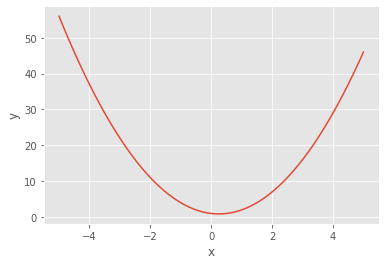

In [14]:
xs = np.linspace(-5., 5, 100)
plt.plot(xs, pol(xs));
plt.xlabel('x')
plt.ylabel('y');

----
## 2. Lambda expresions

**Lambda** is a command that allows you to define a function in one expression, on the flight, without given it a name!

The function is expected to work on the local scope.

In the following example *sq* is a function defined using *lambda* and computes the squared of its argument.

In [15]:
sq = lambda x: x * x
print(' 2 * 2 = ', sq(2.))

xs = list(range(4))
# or using *[predicate(item) for item in iterable]*
xs2 = []
for xi in xs:
    xs2.append( sq(xi) )

print(' xs     = ', xs)
print(' sq(xs) = ', xs2)

 2 * 2 =  4.0
 xs     =  [0, 1, 2, 3]
 sq(xs) =  [0, 1, 4, 9]


The **lambda** function is a crucial ingredient in **functional programming**.

It appears associated to expressions applied to lists, usually with *map()* and *filter()* builtin functions.

In the following example, *map()* applies a function defined on the flight using lambda to compute the squared of its argument to the elements on the list *xs* and produces another list with the squares!

In [16]:
xs  = list(range(4))
sq  = lambda x: x * x
xs2 = list(map(sq, xs))
print(' xs  =  ', xs)
print(' xs2 = ' , xs2)

 xs  =   [0, 1, 2, 3]
 xs2 =  [0, 1, 4, 9]


Here is another example, the **lambda** defines a boolean function that returns true if the argument is even and false if it is odd. We apply it to a list of numbers *ns* using the *filter()* builtin function to select the even numbers in the list.

In [17]:
ns      = list(range(6))
is_even = lambda n: n%2 == 0
even1   = list(map(is_even              , ns))
even2   = list(map(lambda ni: ni%2 == 0 , ns))  

print(' ns    ', ns)
print(' even1 ', even1)
print(' even2 ', even2)

 ns     [0, 1, 2, 3, 4, 5]
 even1  [True, False, True, False, True, False]
 even2  [True, False, True, False, True, False]


In [18]:
evs1  = list(filter(lambda ni: ni%2 == 0, ns))

print(' ns   ', ns)
print(' evs1 ', evs1)

 ns    [0, 1, 2, 3, 4, 5]
 evs1  [0, 2, 4]


Tip: *Lambda* is a powerful command, but use it with care! 
The code is more readable if you define a function better than just defined on the flight with the *lambda* command.

Tip: Instead of using *map()* and *lambda*, you can better use the list expressions:

*[predicate(item) for item in iterable]* 

that are more readable! Let's re-write the code of above:

In [19]:
xs = list(range(4))
# x2s = list(map(lambda xi: xi * xi, xs))
x2s = [xi * xi for xi in xs]
print(' xs  = ' , xs)
print(' x2s = ', x2s)

 xs  =  [0, 1, 2, 3]
 x2s =  [0, 1, 4, 9]


You can make a filter using list expressions:
    
*[item for item in iterable is conditio(item) == True]*

We will see the list expressions in the next section.

In [20]:
ns = list(range(6))
#evs = list/filter(lambda ni: ni%2 == 0, ns))
evs = [ni for ni in ns if (ni%2 == 0)]
print(' ns   ', ns)
print(' even ', evs)

 ns    [0, 1, 2, 3, 4, 5]
 even  [0, 2, 4]


-----
## 3. About arguments

### 3.1 Default arguments

It is common that some functions take a default arguments. To do so in Python, we asign in the definition of the function, the argument to a default value *argument = value*. Now, in the case the user do not passes that argument, the function will use then the default!

In the following example, the *comment* is set by default to *'Please, enter yes or no'*.

In [21]:
def ask_user(comment = 'Please enter yes or no. '):
    
    while True:
        ok = input(comment)
        if (ok in ['y', 'yes']): 
            return True
        elif (ok in ['n', 'no']):
            return False

In [22]:
ask_user('Escribe y/n')

Escribe y/ny


True

Note: If the function has several arguments, the default arguments must go at then end!

### 3.2 Arguments from a list

You can pass several arguments to a function in one go using a tuple. In order to unpack the tuple, just use the * operator in front! 

In [23]:
def prod(a, b):
    return a * b

x = [3, 2]
prod(*x)

6

### 3.3 Arguments from a dictionary

You can also pass the arguments to a function using a dictionary, in that case the keys of the dictonary should be strings and be identical to the name of the arguments of the function. You need to use the double * operator in front of the dictionary!

In [24]:
def print_client_phone(client, phone):
    print(' client ', client, ' phone ', phone)

#data = {'client':'Angel', 'phone':123123123}
#print_client_phone(**data)

In [25]:
print_client_phone('Angel', 55123123)

 client  Angel  phone  55123123


In [26]:
data = {'client':'Angel', 'phone':22123123}
print_client_phone(**data)

 client  Angel  phone  22123123


### 3.4 Typed arguments

Python only requires that the arguments of a function fulfill the part of the interface that is in the body of the function. They use very 'generic' or 'template' arguments. 

But you can name the arguments, to make the code more readable. See the *typing* module within Python.

In [27]:
#from typing import Tuple

def create_polynomial(coeficients : tuple) -> callable:
    """ returns a function that is a polinomial with the coeficients given in the list coeficients
    """
    def pol(x : float) -> float:
        y = 0.
        for i  in range(len(coeficients)):
            y = y + coeficients[i] * (x**i)
        return y
    return pol

In [28]:
cas = (1., 1., 1.)
pol = create_polynomial(cas)
x = 1
print(pol(x))

3.0


----

### Exercises

  1. Define a function to compute the mean and the variance of a list of numbers. Check with numpy
  
  
  2. Given a list of $[(x, y)]$ numbers, make a function to compute its distance to the origin. 
  
  
  4. Define a function to provide a poisson distribution given a mean. Define a functor, that passing as argument the mean value of a poisson will return to you a poisson function with that mean. 


  5. If we measure $n$ and we know it is a random measurement form a poisson distribution with a unknown $\mu$ mean. Can you compute the $p(\mu | n)$? Can you draw the function $p(\mu | n)$ for a given $n$? 


  6. Write a set of functions to fit a sample $\{(x_i, y_i)\}$ points, with uncertainties $\sigma_i$ to a straight line via least squares method.